# Лабораторная работа №1

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

### Описание задачи

###  1. Чтение данных

In [2]:
data = pd.read_csv('athletes.csv', sep = ',', engine = 'python')
print(data.shape)
print(data.columns)

(11538, 11)
Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')


In [3]:
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


#### Доступ к отдельным элементам и выделение подтаблиц (slice)

Доступ к элементам по имени:

In [4]:
print(data.at[2,'name'])
print(data.loc[11534,'name'])

Aaron Brown
Zuzana Hejnova


Доступ к элементам по номеру:

In [5]:
print(data.iat[2,1])
print(data.iloc[11534,1])

Aaron Brown
Zuzana Hejnova


#### Подтаблицы

In [6]:
data.loc[[2,3,0], ['name', 'nationality', 'height']]

,name,nationality,height
2,Aaron Brown,CAN,1.98
3,Aaron Cook,MDA,1.83
0,A Jesus Garcia,ESP,1.72


In [7]:
data.iloc[[2,3,0], [1, 2, 5]]

,name,nationality,height
2,Aaron Brown,CAN,1.98
3,Aaron Cook,MDA,1.83
0,A Jesus Garcia,ESP,1.72


In [8]:
data.loc[[2,3,0], ['name', 'nationality', 'height']].loc[0,'name']

'A Jesus Garcia'

#### Целые строки или столбцы:

In [9]:
data.loc[:, ['name', 'nationality']]
# data.loc[[2, 5], :]
# data['weight']
# data.weight
# data[['name','height', 'weight']]

,name,nationality
0,A Jesus Garcia,ESP
1,A Lam Shin,KOR
2,Aaron Brown,CAN
3,Aaron Cook,MDA
4,Aaron Gate,NZL
...,...,...
11533,Zurian Hechavarria,CUB
11534,Zuzana Hejnova,CZE
11535,di Xiao,CHN
11536,le Quoc Toan Tran,VIE


#### Доступ по булевой маске

In [10]:
df = data.iloc[:4, 0:3]; df

,id,name,nationality
0,736041664,A Jesus Garcia,ESP
1,532037425,A Lam Shin,KOR
2,435962603,Aaron Brown,CAN
3,521041435,Aaron Cook,MDA


In [11]:
df.loc[[True, True, False, True], [False, True, True]]

,name,nationality
0,A Jesus Garcia,ESP
1,A Lam Shin,KOR
3,Aaron Cook,MDA


In [12]:
df.loc[[True, True, False, True]]
# df[[True, True, False, True]]

,id,name,nationality
0,736041664,A Jesus Garcia,ESP
1,532037425,A Lam Shin,KOR
3,521041435,Aaron Cook,MDA


Столбцы "sex", "sport", "nationality" имеют категориальный признак. Заменим их тип object на тип category

In [13]:
data['sex'] = data['sex'].astype('category'); data['sex'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False)

In [14]:
data['sport'] = data['sport'].astype('category'); data['sport'].dtype

CategoricalDtype(categories=['aquatics', 'archery', 'athletics', 'badminton',
                  'basketball', 'boxing', 'canoe', 'cycling', 'equestrian',
                  'fencing', 'football', 'golf', 'gymnastics', 'handball',
                  'hockey', 'judo', 'modern pentathlon', 'rowing',
                  'rugby sevens', 'sailing', 'shooting', 'table tennis',
                  'taekwondo', 'tennis', 'triathlon', 'volleyball',
                  'weightlifting', 'wrestling'],
                 ordered=False)

In [15]:
data['nationality'] = data['nationality'].astype('category'); data['nationality'].dtype

CategoricalDtype(categories=['AFG', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ARG', 'ARM',
                  'ARU', 'ASA',
                  ...
                  'URU', 'USA', 'UZB', 'VAN', 'VEN', 'VIE', 'VIN', 'YEM',
                  'ZAM', 'ZIM'],
                 ordered=False)

Для дальнейшей работы с данными преобразуем "dob" к типу даты

In [16]:
import datetime
data['dob'] = pd.to_datetime(data['dob']); data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,2069-10-17,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,1995-08-10,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,1986-12-19,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0


Что-то пошло не так...после преобразования первый человек в списке родился в 2069 году. Посмотрим сколько всего случаев ошибочного преобразования даты в датасете. Будем считать что все участники олимпиады младше 100 лет (т.е родились не раньше 1916 года) и старше 10 лет.

In [17]:
i=0; count=0
while i < 11537:
    if ((data['dob'].dt.year[i]) > 2006) | ((data['dob'].dt.year[i]) < 1916) :
        print(data['name'][i],data['dob'][i]) 
        count=count+1
    i=i+1
count

A Jesus Garcia 2069-10-17 00:00:00
Abdelkebir Ouaddar 2062-07-15 00:00:00
Abdullah Alrashidi 2063-08-21 00:00:00
Beatriz Ferrer-Salat 2066-03-11 00:00:00
Bernadette Pujals 2068-06-08 00:00:00
Carl Hester 2067-06-29 00:00:00
Catriona Matthew 2069-08-25 00:00:00
Christian Zimmermann 2061-12-12 00:00:00
Cynthia Meyer 2065-10-06 00:00:00
Danilo Caro Guarnieri 2065-09-06 00:00:00
David Chapman 2065-03-22 00:00:00
David Munoz Hidalgo 2064-09-29 00:00:00
Dorothee Schneider 2069-02-17 00:00:00
Eduardo Jose Lorenzo 2066-08-31 00:00:00
Elizabeth Madden 2063-11-20 00:00:00
Emil Milev 2068-05-02 00:00:00
Enkelejda Shehaj Bekurti 2069-01-23 00:00:00
Eric Lamaze 2068-04-17 00:00:00
Fehaid Aldeehani 2066-10-11 00:00:00
Francisco Boza 2064-09-19 00:00:00
Glenn Kable 2063-05-04 00:00:00
Hakan Dahlby 2065-09-15 00:00:00
Hedi Gharbi 2069-08-05 00:00:00
Heidi Diethelm Gerber 2069-03-20 00:00:00
Hubertus Schmidt 2059-10-08 00:00:00
Inessa Merkulova 2064-11-09 00:00:00
Ingrid Klimke 2068-04-01 00:00:00
Isab

83

83 участника олимпиады имеют такую же ошибочную дату рождения как у 1-го человека в списке. Исправим это.

In [18]:
i=0; count=0
while i < 11537:
    if ((data['dob'].dt.year[i]) > 2006) | ((data['dob'].dt.year[i]) < 1916) :
        data['dob'][i]=data['dob'][i] - pd.DateOffset(years=100)
        count=count+1
    i=i+1
print(count)


<ipython-input-18-cc1df30c591c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dob'][i]=data['dob'][i] - pd.DateOffset(years=100)


83


In [19]:
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,1995-08-10,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,1986-12-19,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0


Теперь мы видим, что в датасете не осталось "подозрительных дат". Создадим новый признак, который будет показывать возраст участника на момент начала олимпиады (5 августа 2016)

In [20]:
rio_date=datetime.datetime(2016, 8, 5); rio_date
#data["dob"]
data["age"]=rio_date - data["dob"]
data["age"]=data["age"].astype('timedelta64[Y]')
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,46.0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,29.0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24.0
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,25.0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,1995-08-10,1.64,58.0,athletics,0,0,0,20.0
11534,214461847,Zuzana Hejnova,CZE,female,1986-12-19,1.73,63.0,athletics,0,0,0,29.0
11535,88361042,di Xiao,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0,25.0
11536,900065925,le Quoc Toan Tran,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0,27.0


### 2. Визуализация и описательная статистика

Сводная информация о признаках с помощью метода describe

In [21]:
data['dob'].dtype

dtype('<M8[ns]')

In [22]:
data.describe()

,id,height,weight,gold,silver,bronze,age
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000,11537.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016,26.320447
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320,5.378451
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000,13.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000,23.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000,26.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000,29.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000,62.000000


Стоблец "id" хоть и является числом, но не является количественным признаком, поменяем его тип на тип object

In [23]:
data['id'] = data['id'].astype('object'); data['id'].dtype

dtype('O')

In [24]:
data.describe()

,height,weight,gold,silver,bronze,age
count,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000,11537.000000
mean,1.766282,72.068205,0.057722,0.056769,0.061016,26.320447
std,0.112719,16.177334,0.255910,0.239147,0.243320,5.378451
min,1.210000,31.000000,0.000000,0.000000,0.000000,13.000000
25%,1.690000,60.000000,0.000000,0.000000,0.000000,23.000000
50%,1.760000,70.000000,0.000000,0.000000,0.000000,26.000000
75%,1.840000,81.000000,0.000000,0.000000,0.000000,29.000000
max,2.210000,170.000000,5.000000,2.000000,2.000000,62.000000


Посмотрим информацию о категориальных признаках

In [25]:
data.describe(include=['category'])

,nationality,sex,sport
count,11538,11538,11538
unique,207,2,28
top,USA,male,athletics
freq,567,6333,2363


Построим диаграммы рассеивания для каждой пары количественных переменных

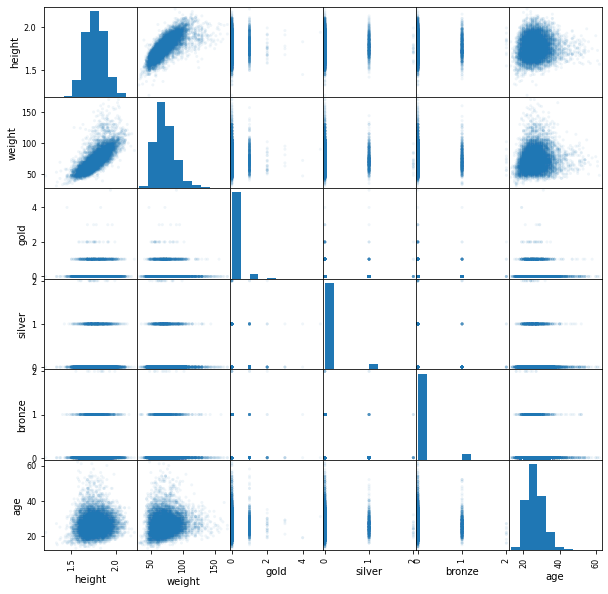

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .07, figsize = (10, 10))
pass

Построим диаграмму рассеивания для признаков "height" и "weight"

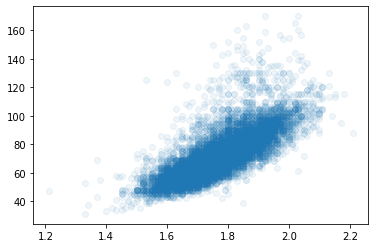

In [27]:
plt.scatter(data['height'], data['weight'], alpha=0.07)
pass

Построим ту же диаграмму, только для 1000 случайных точек

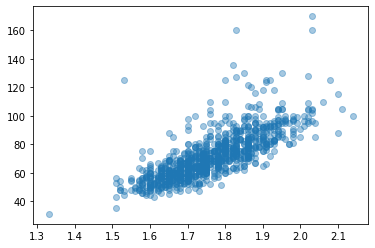

In [28]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

plt.scatter(data.iloc[random_subset]['height'], data.iloc[random_subset]['weight'], alpha=0.4)
pass

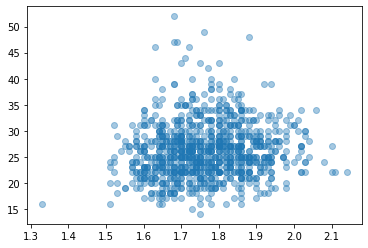

In [29]:
plt.scatter(data.iloc[random_subset]['height'], data.iloc[random_subset]['age'], alpha=0.4)
pass

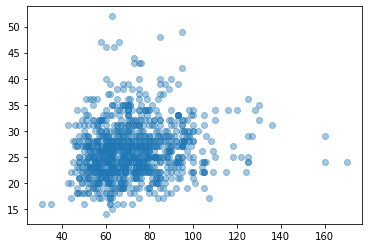

In [30]:
plt.scatter(data.iloc[random_subset]['weight'], data.iloc[random_subset]['age'], alpha=0.4)
pass

Из графиков видно, что есть линейная зависимость между ростом и весом спортсменов (что вполне логично). А вот зависимость роста и веса от возраста не прослеживается. Теперь проверим есть ли зависимость между соотношением роста-веса участника в зависимости от вида спорта и пола.

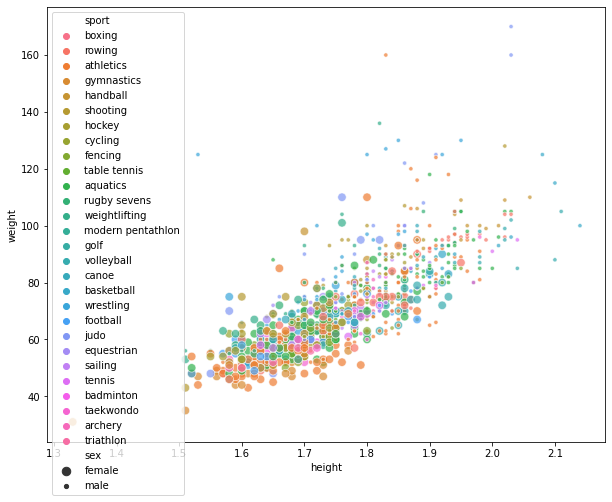

In [31]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='height', y='weight',size='sex', hue='sport', data=data.iloc[random_subset], alpha=0.7)
pass

На графике видно, что спортсмены-женщины, вне зависимости от вида спорта, ниже и легче спортсменов-мужчин. Также заметно, что спорсмены, занимающиеся атлетикой и гимнастикой (оранжевый цвет) отличаются низким весом, а спортсмены, занимающиеся волейболом и баскетболом имеют высокий рост. Сделать выводы по другим видам спорта довольно тяжело из-за их количества и неярковыраженного отличия в цвете на графике.

Построим гистограммы для признаков "height", "weight". 

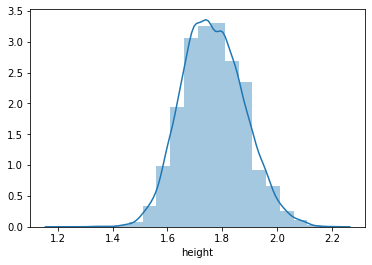

In [32]:
sns.distplot(data['height'], bins = 20)
pass

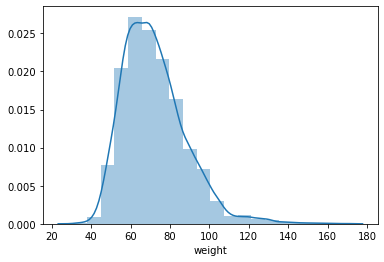

In [33]:
sns.distplot(data['weight'], bins = 20)
pass

С помощью бокс-диаграммы посмотрим зависимость между ростом участников и видом спорта

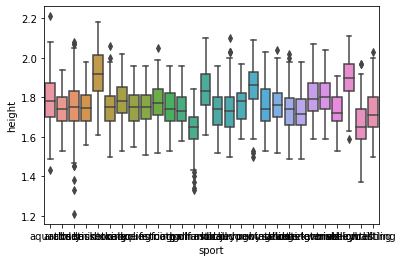

In [34]:
sns.boxplot(x="sport", y="height", data=data)
pass

Названия видов спорта наложились друг на друга. Создадим новый столбец "sport_short" с сокращенными наименованиями.

In [35]:
data['sport_short'] = data['sport']; 
data['sport_short']=data['sport_short'].str.get(0)+data['sport_short'].str.get(1)+data['sport_short'].str.get(2)
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,sport_short
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,46.0,ath
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,29.0,fen
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24.0,ath
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,25.0,tae
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,25.0,cyc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,1995-08-10,1.64,58.0,athletics,0,0,0,20.0,ath
11534,214461847,Zuzana Hejnova,CZE,female,1986-12-19,1.73,63.0,athletics,0,0,0,29.0,ath
11535,88361042,di Xiao,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0,25.0,wre
11536,900065925,le Quoc Toan Tran,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0,27.0,wei


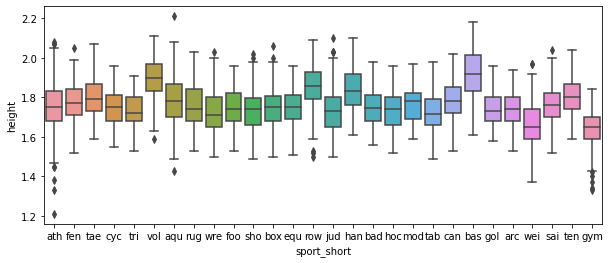

In [36]:
plt.figure(figsize = (10, 4))
box=sns.boxplot(x="sport_short", y="height", data=data)
pass

На полученном графике мы видим, что спортсмены занимающиеся волейболом, греблей, баскетболом и гандболом в среднем выше остальных спортсменов. Самыми низкими "низкими" оказались гимнасты. 

Построим тот же график, но для зависимости между весом и видом спорта.

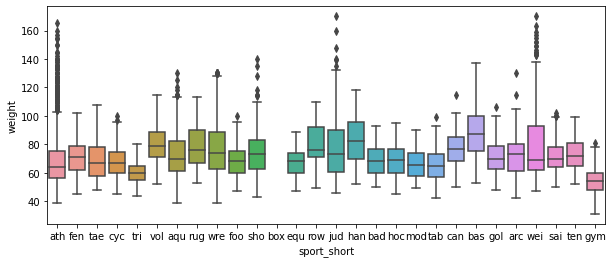

In [37]:
plt.figure(figsize = (10, 4))
sns.boxplot(x="sport_short", y="weight", data=data)
pass

Здесь мы видим что самый большой вес у спортсменов занимающихся гиревым спортом (weightlifting),дзюдо и силовой борьбой. Также есть достаточно много "единичных" случаев большого веса в категории атлетов. Исходя из этого, можно сделать вывод, что это тяжелоатлеты. 

Скрипичная диаграмма роста и веса в зависимости от пола

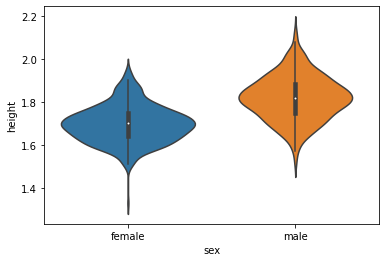

In [38]:
sns.violinplot(x="sex", y="height", data=data.iloc[random_subset])
pass

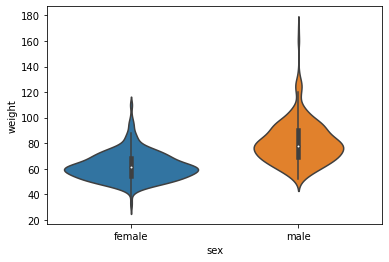

In [39]:
sns.violinplot(x="sex", y="weight", data=data.iloc[random_subset])
pass

Посмотрим матрицу корреляции в табличном виде и графическом образе

In [40]:
corr_mat = data.corr()
corr_mat

,height,weight,gold,silver,bronze,age
height,1.000000,0.759037,0.049285,0.041002,0.020865,0.069759
weight,0.759037,1.000000,0.035854,0.030944,0.026113,0.109832
gold,0.049285,0.035854,1.000000,0.024349,0.004682,0.007720
silver,0.041002,0.030944,0.024349,1.000000,-0.014844,0.002635
bronze,0.020865,0.026113,0.004682,-0.014844,1.000000,-0.011233
age,0.069759,0.109832,0.007720,0.002635,-0.011233,1.000000


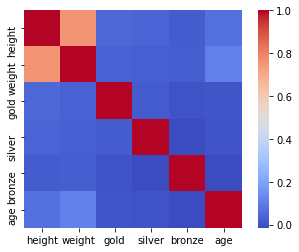

In [41]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

### 3. Обработка пропущенных значений

In [42]:
data.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
age              1
sport_short      0
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [43]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            1
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
age            0
sport_short    0
dtype: int64

Единственное поле, где отсутствует дата рождения заполним датой рождения первого спортсмена в датасете. 

In [44]:
data['dob'].fillna(data['dob'].iloc[0], inplace=True)
data.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
age            0
sport_short    0
dtype: int64

### 4. Векторизация (обработка категориальных признаков)

Подготовка данных

In [45]:
data.dtypes

id                      int64
name                   object
nationality          category
sex                  category
dob            datetime64[ns]
height                float64
weight                float64
sport                category
gold                    int64
silver                  int64
bronze                  int64
age                   float64
sport_short            object
dtype: object

Необязательно приводить "sport_short" к категориальному, так как по сути он является копией признака "sport"

In [46]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns_int   = [c for c in data.columns if data[c].dtype.name == 'int64']
numerical_columns_float   = [c for c in data.columns if data[c].dtype.name == 'float64']
numerical_columns= numerical_columns_float +numerical_columns_int
print(categorical_columns)
print(numerical_columns)

['nationality', 'sex', 'sport']
['height', 'weight', 'age', 'id', 'gold', 'silver', 'bronze']


In [47]:
for c in categorical_columns:
    print(c, data[c].unique())

nationality [ESP, KOR, CAN, MDA, NZL, ..., SOM, PNG, YEM, SWZ, DMA]
Length: 207
Categories (207, object): [ESP, KOR, CAN, MDA, ..., PNG, YEM, SWZ, DMA]
sex [male, female]
Categories (2, object): [male, female]
sport [athletics, fencing, taekwondo, cycling, triathlon, ..., archery, weightlifting, sailing, tennis, gymnastics]
Length: 28
Categories (28, object): [athletics, fencing, taekwondo, cycling, ..., weightlifting, sailing, tennis, gymnastics]


Делим категориальные признаки на бинарные и небинарные. Бинарный признак мужской/женский пол заменим на числовой. 

Мужской -> 0, Женский -> 1

In [48]:
data['sex'] = pd.factorize(data['sex'])[0]; data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,sport_short
0,736041664,A Jesus Garcia,ESP,0,1969-10-17,1.72,64.0,athletics,0,0,0,46.0,ath
1,532037425,A Lam Shin,KOR,1,1986-09-23,1.68,56.0,fencing,0,0,0,29.0,fen
2,435962603,Aaron Brown,CAN,0,1992-05-27,1.98,79.0,athletics,0,0,1,24.0,ath
3,521041435,Aaron Cook,MDA,0,1991-01-02,1.83,80.0,taekwondo,0,0,0,25.0,tae
4,33922579,Aaron Gate,NZL,0,1990-11-26,1.81,71.0,cycling,0,0,0,25.0,cyc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,1,1995-08-10,1.64,58.0,athletics,0,0,0,20.0,ath
11534,214461847,Zuzana Hejnova,CZE,1,1986-12-19,1.73,63.0,athletics,0,0,0,29.0,ath
11535,88361042,di Xiao,CHN,0,1991-05-14,1.85,100.0,wrestling,0,0,0,25.0,wre
11536,900065925,le Quoc Toan Tran,VIE,0,1989-04-05,1.60,56.0,weightlifting,0,0,0,27.0,wei


К категориальному (небинарному) признаку "sport" применим метод бинаризации

In [49]:
Sport_dummies = pd.get_dummies(data['sport'])
Sport_dummies.head()

,aquatics,archery,athletics,badminton,basketball,boxing,canoe,cycling,equestrian,fencing,...,rugby sevens,sailing,shooting,table tennis,taekwondo,tennis,triathlon,volleyball,weightlifting,wrestling
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


То же самое делаем для признака "nationality"

In [50]:
Nationality_dummies = pd.get_dummies(data['nationality'])
Nationality_dummies.head()

,AFG,ALB,ALG,AND,ANG,ANT,ARG,ARM,ARU,ASA,...,URU,USA,UZB,VAN,VEN,VIE,VIN,YEM,ZAM,ZIM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Объединяем бинаризированные категориальные признаки в одну таблицу

In [51]:
train_data=data['sex']
train_data=pd.concat((train_data,Nationality_dummies,Sport_dummies,), axis = 1) 
#train_data = train_data.drop(['sport','nationality'], axis=1)
train_data

,sex,AFG,ALB,ALG,AND,ANG,ANT,ARG,ARM,ARU,...,rugby sevens,sailing,shooting,table tennis,taekwondo,tennis,triathlon,volleyball,weightlifting,wrestling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11534,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 5. Нормализация количественных признаков

In [52]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,height,weight,age,id,gold,silver,bronze
count,11538.000000,11538.000000,11538.000000,1.153800e+04,11538.000000,11538.000000,11538.000000
mean,1.766102,71.950078,26.320419,4.999885e+08,0.057722,0.056769,0.061016
std,0.111100,15.715843,5.378218,2.908648e+08,0.255910,0.239147,0.243320
min,1.210000,31.000000,13.000000,1.834700e+04,0.000000,0.000000,0.000000
25%,1.690000,61.000000,23.000000,2.450997e+08,0.000000,0.000000,0.000000
50%,1.760000,70.000000,26.000000,5.002011e+08,0.000000,0.000000,0.000000
75%,1.840000,80.000000,29.000000,7.539874e+08,0.000000,0.000000,0.000000
max,2.210000,170.000000,62.000000,9.999878e+08,5.000000,2.000000,2.000000


Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [53]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,height,weight,age,id,gold,silver,bronze
count,1.153800e+04,1.153800e+04,1.153800e+04,1.153800e+04,1.153800e+04,1.153800e+04,1.153800e+04
mean,5.346461e-14,-2.317415e-16,-3.658453e-16,-3.074331e-17,1.817608e-16,-1.562525e-15,4.558669e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.005429e+00,-2.605656e+00,-2.476735e+00,-1.718909e+00,-2.255571e-01,-2.373808e-01,-2.507633e-01
25%,-6.849914e-01,-6.967541e-01,-6.173828e-01,-8.763138e-01,-2.255571e-01,-2.373808e-01,-2.507633e-01
50%,-5.492756e-02,-1.240836e-01,-5.957725e-02,7.307652e-04,-2.255571e-01,-2.373808e-01,-2.507633e-01
75%,6.651454e-01,5.122170e-01,4.982283e-01,8.732542e-01,-2.255571e-01,-2.373808e-01,-2.507633e-01
max,3.995483e+00,6.238922e+00,6.634089e+00,1.719009e+00,1.931257e+01,8.125673e+00,7.968858e+00


#### Соединим все в одну таблицу

In [54]:
train_data=pd.concat((train_data,data_numerical,), axis = 1) 
train_data = train_data.drop('id', axis = 1)
train_data

,sex,AFG,ALB,ALG,AND,ANG,ANT,ARG,ARM,ARU,...,triathlon,volleyball,weightlifting,wrestling,height,weight,age,gold,silver,bronze
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.414964,-0.505864,3.659126,-0.225557,-0.237381,-0.250763
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.775001,-1.014904,0.498228,-0.225557,-0.237381,-0.250763
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.925273,0.448587,-0.431448,-0.225557,-0.237381,3.859047
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.575136,0.512217,-0.245512,-0.225557,-0.237381,-0.250763
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.395118,-0.060454,-0.245512,-0.225557,-0.237381,-0.250763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1.135037,-0.887644,-1.175188,-0.225557,-0.237381,-0.250763
11534,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.324955,-0.569494,0.498228,-0.225557,-0.237381,-0.250763
11535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.755155,1.784818,-0.245512,-0.225557,-0.237381,-0.250763
11536,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,-1.495074,-1.014904,0.126358,-0.225557,-0.237381,-0.250763


### 6. Деление на обучающую и тестовую выборки

In [61]:
X = train_data.drop('sex', axis = 1) # выбрасываем столбец 'sport'
y = train_data['sex']
feature_names = X.columns

In [62]:
type(feature_names)
feature_names

Index(['AFG', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ARG', 'ARM', 'ARU', 'ASA',
       ...
       'triathlon', 'volleyball', 'weightlifting', 'wrestling', 'height',
       'weight', 'age', 'gold', 'silver', 'bronze'],
      dtype='object', length=241)

In [63]:
X = X.to_numpy()

In [64]:
y

0        0
1        1
2        0
3        0
4        0
        ..
11533    1
11534    1
11535    0
11536    0
11537    0
Name: sex, Length: 11538, dtype: int64

In [65]:
print(X.shape)
print(y.shape)
N, d = X.shape

(11538, 241)
(11538,)


In [67]:
y = y.to_numpy()
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Делим данные на обучающую и тестовую выборки в соотношении 70 на 30

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

8653 2885


### 7. Классификатор ближайших соседей

Устанавливаем число соседей равным 7ми

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [92]:
knn

KNeighborsClassifier(n_neighbors=7)

In [93]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict); err_test
# err_test = 1 - knn.score(X_test, y_test); err_test

0.1854419410745234

In [95]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1311  288]
 [ 247 1039]]


Пробуем разное количество соседей для подбора лучшего значения

In [96]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 7, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.1727698941382212 15


In [97]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.14214723217381256 0.19688041594454073


Подбор количества ближайших соседей показал, что наилучшее количество - 15, однако ошибка тестовой выборки стала немного больше

In [98]:
knn = KNeighborsClassifier(n_neighbors = 15)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [99]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict); err_test

0.19688041594454073

In [100]:
print(confusion_matrix(y_test, y_test_predict))

[[1297  302]
 [ 266 1020]]
